# XLM-T: Multilingual Language Models in Twitter
# for Sentiment Analysis and Beyond

In [140]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [141]:
# Load the train and test data from TXT files
train_file = 'train_text.txt'
test_file = 'test_text.txt'


In [142]:

with open(train_file, 'r', encoding='utf-8') as file:
    train_data = file.readlines()

with open(test_file, 'r', encoding='utf-8') as file:
    test_data = file.readlines()




In [143]:
# Preprocess the data (e.g., remove special characters, lowercase, remove stopwords)

# Split the data into features (X) and labels (y)
X_train = [line.strip() for line in train_data]
y_train = [line.strip().split()[0] for line in train_data]
X_test = [line.strip() for line in test_data]



In [144]:
# Tokenize the text and build the vocabulary
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)


In [145]:

# Vocabulary and word frequencies
vocabulary = vectorizer.vocabulary_
vocabulary = {key: value for key, value in sorted(vocabulary.items(), key=lambda x: x[1])}
word_frequencies = X_train_bow.sum(axis=0).A1




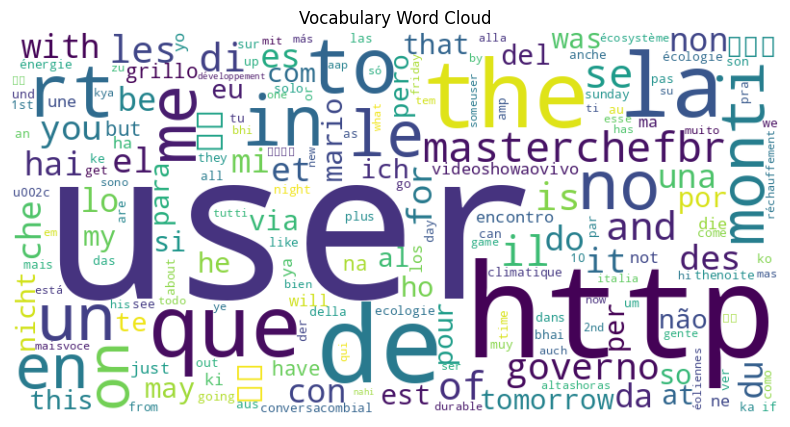

In [146]:
# Generate word cloud from word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vocabulary.keys(), word_frequencies)))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Vocabulary Word Cloud')
plt.show()




In [147]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Step 1: Load and preprocess the data
with open('train_text.txt', 'r') as f:
    train_data = f.readlines()
    
with open('test_text.txt', 'r') as f:
    test_data = f.readlines()

# Step 2: Build the vocabulary
vectorizer = CountVectorizer()
vectorizer.fit(train_data)
vocabulary = vectorizer.vocabulary_

# Step 3: Vectorize the data
X_train = vectorizer.transform(train_data)
X_test = vectorizer.transform(test_data)

# Step 4: Prepare the labels
with open('train_labels.txt', 'r') as f:
    train_labels = f.readlines()

with open('test_labels.txt', 'r') as f:
    test_labels = f.readlines()

y_train = np.array(train_labels)
y_test = np.array(test_labels)

# Step 5: Scale the data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    clf = make_pipeline(scaler, model)
    clf.fit(X_train, y_train)
    
    # Step 7: Make predictions
    y_pred = clf.predict(X_test)

    # Step 8: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    

    print(f"--- {name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    print()



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--- Logistic Regression ---
Accuracy: 0.45229885057471264
Precision: 0.3391042134260147
Recall: 0.33927483420320886
F1-score: 0.33901308465089297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--- Decision Tree ---
Accuracy: 0.4245689655172414
Precision: 0.31838678751155813
Recall: 0.3184711472691856
F1-score: 0.318392833032457

--- KNN ---
Accuracy: 0.32600574712643676
Precision: 0.24115631918324837
Recall: 0.24453586192026883
F1-score: 0.21796470529915885



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Step 1: Load and preprocess the data
data = pd.read_csv('Tweets.csv')
data = data.dropna(subset=['text'])  # Remove rows with missing text
data = data.fillna('')  # Replace other missing values with empty string
X = data['text']
y = data['sentiment']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the vocabulary
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
vocabulary = vectorizer.vocabulary_

# Step 4: Vectorize the data
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 5: Scale the data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_vectorized)
X_test_scaled = scaler.transform(X_test_vectorized)

# Step 6: Train the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    clf = make_pipeline(scaler, model)
    clf.fit(X_train_vectorized, y_train)
    
    # Step 7: Make predictions
    y_pred = clf.predict(X_test_vectorized)

    # Step 8: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')


    print(f"--- {name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    print()


--- Logistic Regression ---
Accuracy: 0.5762372634643377
Precision: 0.5781035972620523
Recall: 0.5773783212294045
F1-score: 0.5777338688524237

--- Decision Tree ---
Accuracy: 0.6464701601164483
Precision: 0.6497233539862216
Recall: 0.6429762287248386
F1-score: 0.645700629372143

--- KNN ---
Accuracy: 0.5493085880640466
Precision: 0.5706904054963305
Recall: 0.5303964538920952
F1-score: 0.5368474842689993

